In [51]:
!pip install numpy pandas matplotlib seaborn mysql-connector-python

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

db = mysql.connector.connect(host = "localhost",
                             username = "root",
                             password = "M@ngo112",
                             database = "ECommerce")

cur = db.cursor()

# List all the unique cities where customers are located.

In [ ]:
query = """ SELECT DISTINCT customer_city from customers """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns=["Cities"])

df

,Cities
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


# Count the numbers of orders placed in 2017.

In [21]:
query = """ SELECT COUNT(order_id) FROM orders WHERE year(order_purchase_timestamp) = 2017  """

cur.execute(query)

data = cur.fetchall()

"Total orders placed in 2017 are", data[0][0]

('Total orders placed in 2017 are', 45101)

# Find the total sales per category.

In [22]:
query = """ select products.product_category category, 
round(sum(payments.payment_value), 2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category
"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "Sales"])

df

,Category,Sales
0,perfumery,506738.66
1,Furniture Decoration,1430176.39
2,telephony,486882.05
3,bed table bath,1712553.67
4,automotive,852294.33
...,...,...
69,cds music dvds,1199.43
70,La Cuisine,2913.53
71,Fashion Children's Clothing,785.67
72,PC Gamer,2174.43


# Calculate the percentage of orders that were paid in installments.

In [17]:
query = """ select (sum(case when payment_installments >= 1 then 1 else 0 end))/count(*)*100 from payments """

cur.execute(query)

data = cur.fetchall()

data

[(Decimal('99.9981'),)]

# Count the number of customers from each state.

In [38]:
query = """ select customer_state, count(customer_id)
from customers group by customer_state
 """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns = ["State","No. of customer"])

df

,State,No. of customer
0,SP,41746
1,SC,3637
2,MG,11635
3,PR,5045
4,RJ,12852
5,RS,5466
6,PA,975
7,GO,2020
8,ES,2033
9,BA,3380


# Calculate the no. of orders per month in 2018.

In [32]:
query = """ select monthname(order_purchase_timestamp) months, count(order_id) order_count
from orders where year(order_purchase_timestamp) = 2018
group by months
 """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=['Month', 'Order_Count'])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October']

df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

df = df.sort_values('Month').reset_index(drop=True)

df

,Month,Order_Count
0,January,7269
1,February,6728
2,March,7211
3,April,6939
4,May,6873
5,June,6167
6,July,6292
7,August,6512
8,September,16
9,October,4


# Find the average no. of products per order, grouped by customer city.

In [37]:
query = """ with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)
select customers.customer_city, round(avg(count_per_order.oc), 2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city ;
 """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns = ["Customer City","Average products/order"])

df

,Customer City,Average products/order
0,sao paulo,1.16
1,sao jose dos campos,1.14
2,porto alegre,1.17
3,indaial,1.12
4,treze tilias,1.27
...,...,...
4105,buriti,3.00
4106,morro agudo de goias,1.00
4107,santa filomena,1.00
4108,guamiranga,1.00


# Calculate the percentage of total revenue contributed by each product category.

In [46]:
query = """ select upper(products.product_category) category,
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items
on products.product_id = order_items.product_id
join payments
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc;
 """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["Category","Percentage Distribution"])

df

,Category,Percentage Distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93
...,...,...
69,HOUSE COMFORT 2,0.01
70,CDS MUSIC DVDS,0.01
71,PC GAMER,0.01
72,FASHION CHILDREN'S CLOTHING,0.00


# Identify the correlation between product price & the no. of times a product has been purchased.

In [61]:
query = """ select products.product_category,
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id=order_items.product_id
group by products.product_category;
 """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data,columns=["Product Category","Order count","Price"])

# Now Correlation

arr1 = df["Order count"]
arr2 = df["Price"]

np.corrcoef([arr1,arr2])

array([[ 1.        , -0.10631514],
       [-0.10631514,  1.        ]])

# Calculate the total revenue generated by each seller, and rank them by revenue.

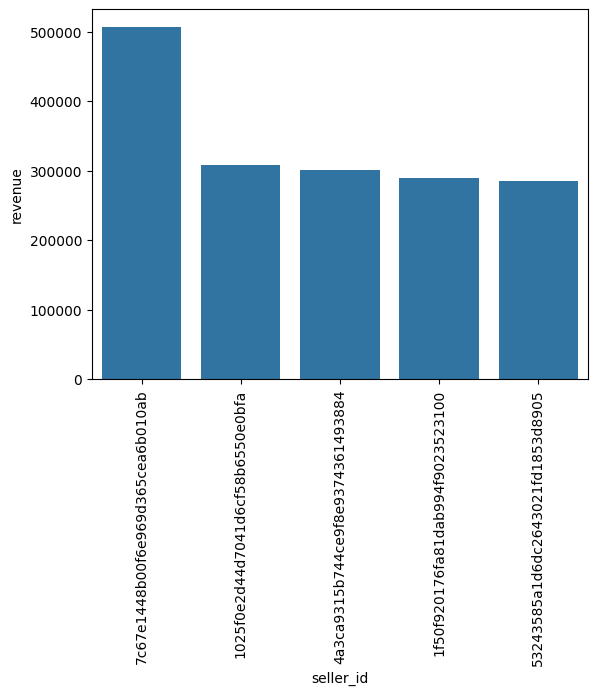

In [63]:
query = """ select *, dense_rank() over (order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a"""

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame (data, columns = ["seller_id", "revenue", "rank"])

df = df.head()

sns.barplot(x = "seller_id", y = "revenue", data = df)

plt.xticks(rotation = 90)

plt.show()